In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.preprocessing import StandardScaler

In [3]:
# LOAD DATASET
data=pd.read_csv("D:\customer test csv\Test.csv")
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [4]:
# IDENTIFY CATEGORIAL COLUMNS
categorical_cols=['Gender','Ever_Married','Graduated','Profession','Spending_Score','Var_1']

In [5]:
# APPLY ONE HOT ENCODING
data=pd.get_dummies(data,columns=categorical_cols,drop_first=True)

In [6]:
# FILL MISSING VALUES IN NUMERICALCOLUMNS WITH MEDIAN
data.fillna(data.median(numeric_only=True),inplace=True)

In [7]:
# APPLY STANDARD SCALER
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)

In [8]:
# CONVERT SCALED DATA BACK TO DATAFRAME FOR BETTER READABILITY
scaled_df=pd.DataFrame(scaled_data,columns=data.columns)
scaled_df.head()

,ID,Age,Work_Experience,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,...,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,-1.697994,-0.450948,-0.748105,-1.172097,-1.087983,0.853399,0.799891,-0.31854,3.182979,-0.359731,...,-0.303074,-0.210042,-0.415024,0.790961,-0.238155,-0.336356,-0.415024,-0.105652,0.755759,-0.160534
1,-1.696084,-0.391999,1.752242,0.792450,0.919132,0.853399,0.799891,-0.31854,-0.314171,-0.359731,...,-0.303074,-0.210042,-0.415024,-1.264285,-0.238155,-0.336356,-0.415024,-0.105652,0.755759,-0.160534
2,-1.695320,1.494372,-0.748105,-1.172097,-1.087983,0.853399,-1.250171,-0.31854,-0.314171,-0.359731,...,-0.303074,-0.210042,-0.415024,0.790961,-0.238155,-0.336356,-0.415024,-0.105652,0.755759,-0.160534
3,-1.693792,0.904881,2.689872,-0.517248,0.919132,0.853399,-1.250171,-0.31854,-0.314171,-0.359731,...,-0.303074,-0.210042,2.409502,-1.264285,-0.238155,-0.336356,-0.415024,-0.105652,0.755759,-0.160534
4,-1.693410,-1.453083,-0.435562,0.792450,-1.087983,-1.171785,-1.250171,-0.31854,-0.314171,-0.359731,...,-0.303074,4.760952,-0.415024,0.790961,-0.238155,-0.336356,-0.415024,-0.105652,0.755759,-0.160534


In [9]:
# COMPUTE LINKAGE MATRIX
linked=linkage(scaled_df,method='ward') # ward's method minimize variance
linked

array([[1.49400000e+03, 1.49600000e+03, 7.64015681e-04, 2.00000000e+00],
       [2.11800000e+03, 2.12600000e+03, 1.06962195e-02, 2.00000000e+00],
       [9.24000000e+02, 9.40000000e+02, 1.94823999e-02, 2.00000000e+00],
       ...,
       [5.23000000e+03, 5.23600000e+03, 7.98978092e+01, 3.88000000e+02],
       [5.24300000e+03, 5.24900000e+03, 8.27613520e+01, 2.23900000e+03],
       [5.25000000e+03, 5.25100000e+03, 9.58389032e+01, 2.62700000e+03]])

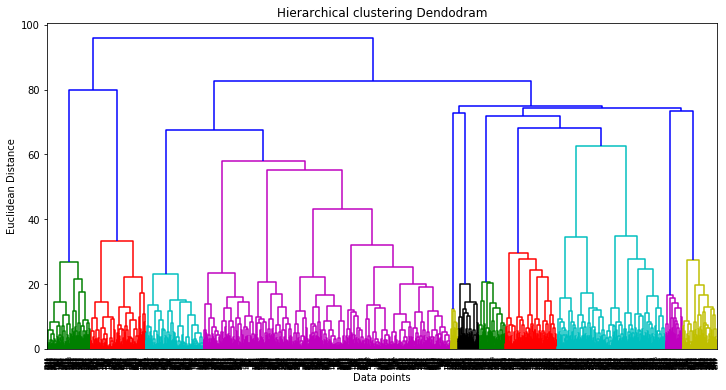

In [10]:
# PLOT DENDOGRAM
plt.figure(figsize=(12,6))
dendrogram(linked,orientation='top',distance_sort='descending',show_leaf_counts=True)
plt.title("Hierarchical clustering Dendodram")
plt.xlabel("Data points")
plt.ylabel("Euclidean Distance")
plt.show()

In [11]:
# APPLYING AGGLOMERATIVE CLUSTERING
n_clusters=3
hc=AgglomerativeClustering(n_clusters=n_clusters,affinity='euclidean',linkage='ward')
cluster_labels=hc.fit_predict(scaled_df)


In [12]:
# ADD CLUSTER LABELS TO DATAFRAME
scaled_df["cluster"]=cluster_labels
scaled_df.head()

,ID,Age,Work_Experience,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,...,Profession_Marketing,Spending_Score_High,Spending_Score_Low,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,cluster
0,-1.697994,-0.450948,-0.748105,-1.172097,-1.087983,0.853399,0.799891,-0.31854,3.182979,-0.359731,...,-0.210042,-0.415024,0.790961,-0.238155,-0.336356,-0.415024,-0.105652,0.755759,-0.160534,1
1,-1.696084,-0.391999,1.752242,0.792450,0.919132,0.853399,0.799891,-0.31854,-0.314171,-0.359731,...,-0.210042,-0.415024,-1.264285,-0.238155,-0.336356,-0.415024,-0.105652,0.755759,-0.160534,2
2,-1.695320,1.494372,-0.748105,-1.172097,-1.087983,0.853399,-1.250171,-0.31854,-0.314171,-0.359731,...,-0.210042,-0.415024,0.790961,-0.238155,-0.336356,-0.415024,-0.105652,0.755759,-0.160534,2
3,-1.693792,0.904881,2.689872,-0.517248,0.919132,0.853399,-1.250171,-0.31854,-0.314171,-0.359731,...,-0.210042,2.409502,-1.264285,-0.238155,-0.336356,-0.415024,-0.105652,0.755759,-0.160534,0
4,-1.693410,-1.453083,-0.435562,0.792450,-1.087983,-1.171785,-1.250171,-0.31854,-0.314171,-0.359731,...,4.760952,-0.415024,0.790961,-0.238155,-0.336356,-0.415024,-0.105652,0.755759,-0.160534,1


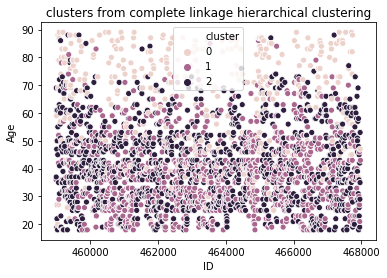

In [17]:
sns.scatterplot(x=data.iloc[:,0],y=data.iloc[:,1],hue=scaled_df["cluster"])
plt.title("clusters from complete linkage hierarchical clustering")
plt.show()